In [1]:
import keras.utils as image
img = image.load_img(path="crop_7_3.jpg",grayscale=True,target_size=(40,40,1)).copy()
img = image.img_to_array(img)
test_img = img.reshape((1,1600))



d:\new_program\Python\Python311\Lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


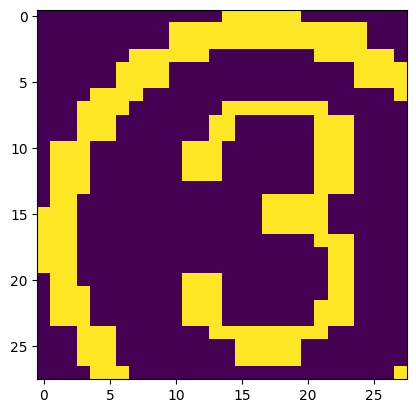

In [2]:
from matplotlib import pyplot as plt
img = 255 - img
        #những giá trị nhỏ hơn 100 thì đặt bằng 0
        
img[img<100]=0
img[img>=100]=255
img = img.reshape((40,40))
img2 = img.copy()
plt.imshow(img2)
plt.show()

In [3]:
#set các tọa độ đường viền
bound_pixel=set()
for i in range(40):
    bound_pixel.add((0,i))
    bound_pixel.add((27,i))
    bound_pixel.add((i,0))
    bound_pixel.add((i,27))


In [4]:
#đi tìm tông màu nổi trội của đường vièn
dominant_color = 0
count_black = 0
count_white = 0
for pixel in bound_pixel:
    if img2[pixel[0]][pixel[1]] == 0:
        count_black += 1
    else:
        count_white += 1
if count_black > count_white:
    dominant_color = 0
else:
    dominant_color = 255

In [5]:
img2[0,0]
visited = set()
grey_pixel = set()
def dfs(x,y):
    if img2[x,y] == dominant_color:
        return
    grey_pixel.add((x,y))
    for i in range(-1,2):
        for j in range(-1,2):
            if(i!=0 or j!=0):
                if(x+i>=0 and x+i<40 and y+j>=0 and y+j<40):
                    if((x+i,y+j) not in visited and (x+i,y+j) not in grey_pixel):
                        dfs(x+i,y+j)
    visited.add((x,y))
    img2[x,y] = dominant_color
for pixel in bound_pixel:
    dfs(pixel[0],pixel[1])

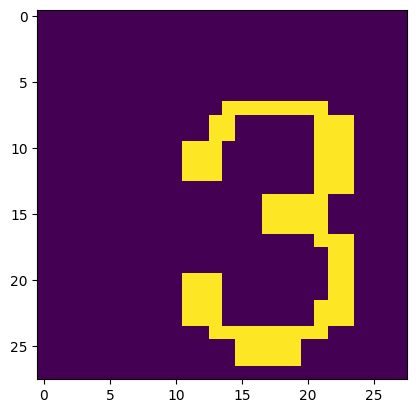

In [6]:
#in ra ảnh đã xử lý
plt.imshow(img2)

In [7]:
#lưu ảnh đã xử lý
#đưa về grayscale 0-255

plt.imsave("3.jpg",img2)